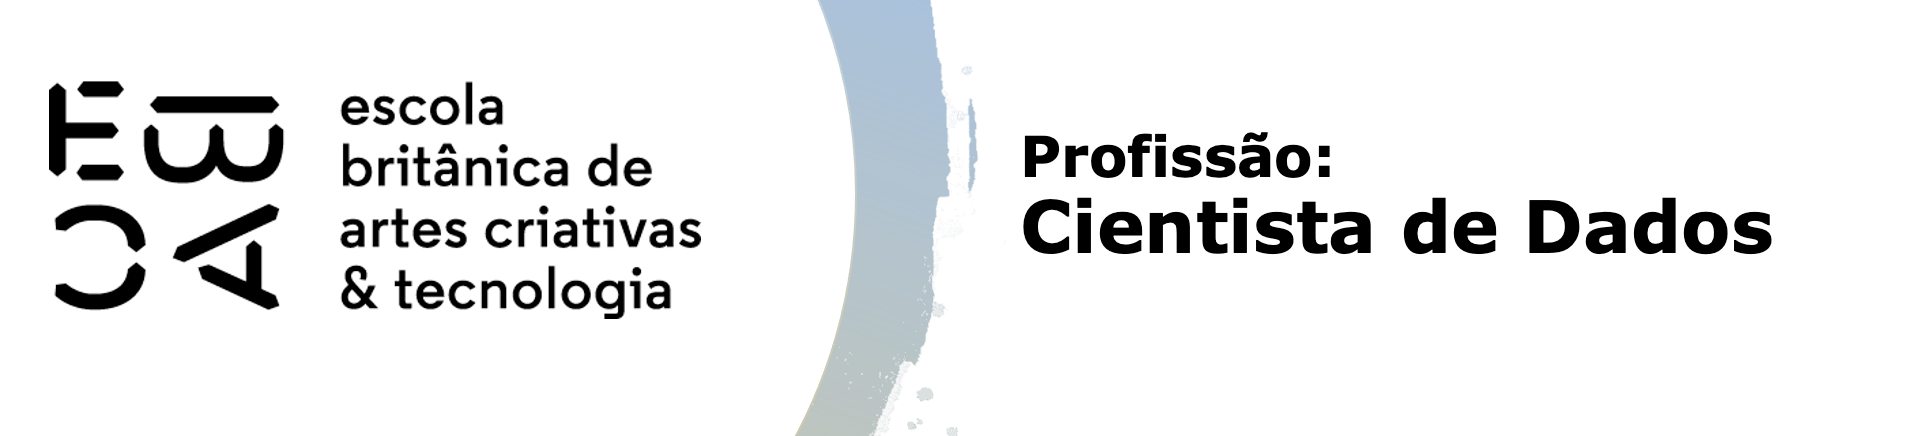

# Tarefa

In [13]:
import pandas as pd
import seaborn as sns

from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as st

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<AxesSubplot: xlabel='sex', ylabel='body_mass_g'>

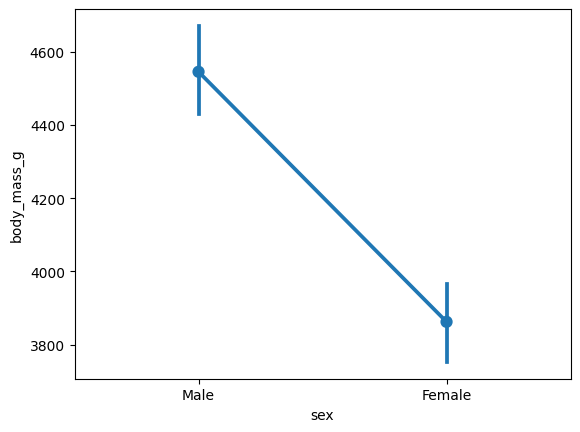

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [11]:
df_aux = pg.groupby('sex')['body_mass_g'].mean()

In [6]:
macho_peso = pg.loc[pg['sex'] == 'Male', 'body_mass_g']
femea_peso = pg.loc[pg['sex'] == 'Female', 'body_mass_g']

teste_t = ttest_ind(macho_peso, femea_peso)

print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

Estatística do teste: 8.54
             P-value: 0.0000
  Graus de liberdade: 331.00


Há diferença estatisticamente significativa entre o peso corporal de machos e fêmeas

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

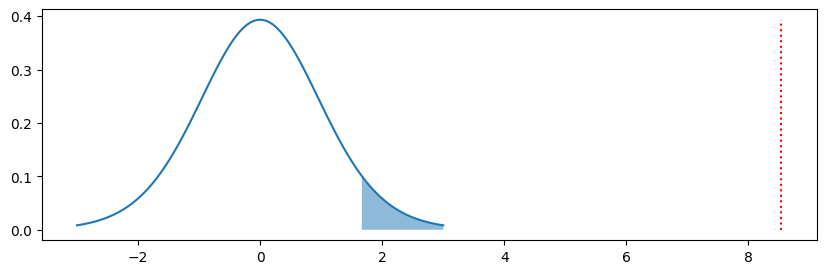

In [18]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.t.pdf(x, 18)

# low = início da região crítica do teste
low = st.t.ppf(.95, 331)
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[teste_t[0]], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)


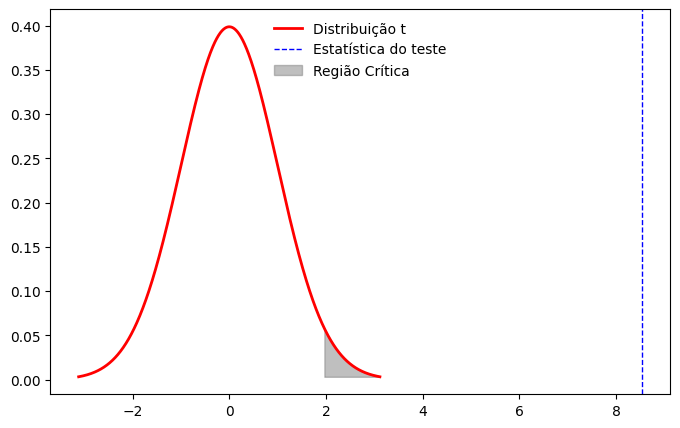

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define as amostras
male_weight = pg.loc[pg['sex'] == 'Male', 'body_mass_g']
female_weight = pg.loc[pg['sex'] == 'Female', 'body_mass_g']

# Define o nível de significância e os graus de liberdade
alpha = 0.05
df = len(male_weight) + len(female_weight) - 2

# Calcula a estatística de teste t e o valor p
t_stat, p_value, gf = ttest_ind(male_weight, female_weight)

# Define os limites do eixo x
t_critical = t.ppf(1 - alpha / 2, df)
x_min = t.ppf(0.001, df)
x_max = t.ppf(0.999, df)
x = np.linspace(x_min, x_max, 1000)

# Cria o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, t.pdf(x, df), 'r-', lw=2, label='Distribuição t')
ax.axvline(t_stat, color='blue', linestyle='--', lw=1, label='Estatística do teste')
ax.fill_betweenx(t.pdf(x, df), x, t_critical, where=x > t_critical, color='gray', label='Região Crítica', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [28]:
# Divide o conjunto de dados em três subconjuntos, um para cada espécie
ad_weight = pg.loc[pg['species'] == 'Adelie', 'body_mass_g']
ch_weight = pg.loc[pg['species'] == 'Chinstrap', 'body_mass_g']
g_weight = pg.loc[pg['species'] == 'Gentoo', 'body_mass_g']

# Realiza o teste T para cada subconjunto
test_ad = ttest_ind(ad_weight.dropna(), ch_weight.dropna())
test_ch = ttest_ind(ch_weight.dropna(), g_weight.dropna())
test_g = ttest_ind(ad_weight.dropna(), g_weight.dropna())

print(f'P-value para Adelie: {test_ad[1]:.2f}')
print(f'P-value para Chinstrap: {test_ch[1]:.2f}')
print(f'P-value para Gentoo: {test_g[1]:.2f}')

P-value para Adelie: 0.61
P-value para Chinstrap: 0.00
P-value para Gentoo: 0.00
